In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
file_path='C:\\Users\\bhavi\\Downloads\\Python_Diwali_Sales_Analysis-main\\Python_Diwali_Sales_Analysis-main\\Diwali Sales Data.csv'
df = pd.read_csv(file_path, encoding= 'latin1') #to avoid error

In [16]:
df.shape

(11251, 15)

In [17]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [18]:
#data cleaning-starts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [19]:
df.drop(['Status','unnamed1'], axis = 1 , inplace= True)

In [25]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [28]:
df.dropna(inplace= True)

In [32]:
df[["Age", "Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [33]:
#EDA
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS #

## Gender ##

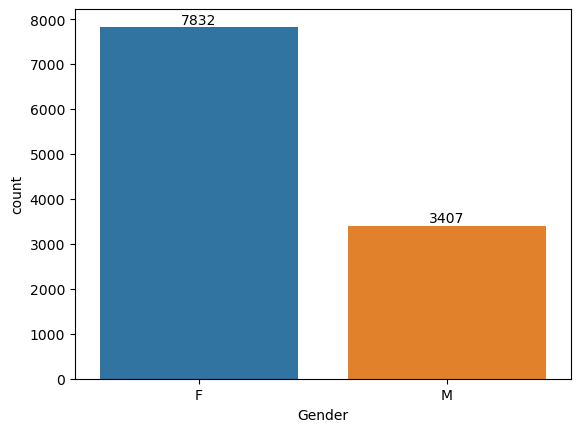

In [35]:
ax= sns.countplot(x= 'Gender', data= df)

for bars in ax.containers:
    ax.bar_label(bars)

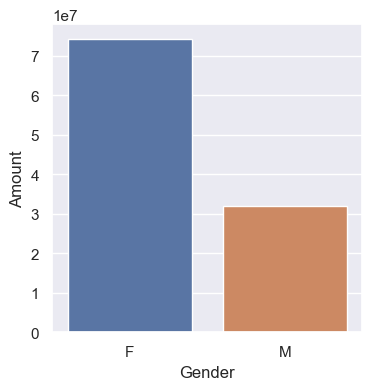

In [85]:
# Total Amount vs Gender
sales_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by= "Amount", ascending=False)
ax= sns.barplot(x='Gender', y='Amount',data=sales_gender)

*From the above observation, females are the majority of the buyers compared to males.*

## Age ##

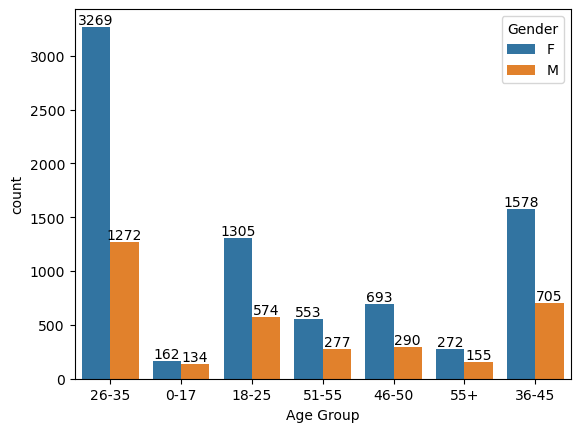

In [72]:
ax= sns.countplot(data= df,x= 'Age Group', hue="Gender")

for bars in ax.containers:
    ax.bar_label(bars)

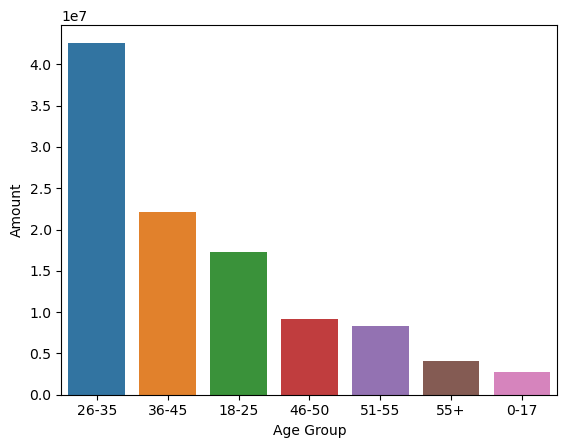

In [54]:
#Total amount vs Age Group
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by= "Amount", ascending=False)
ax= sns.barplot(x='Age Group', y='Amount',data=sales_age)

From the above graph, the Female of 26-35 age group comprises the majority of buyers.

## Martial Status ##

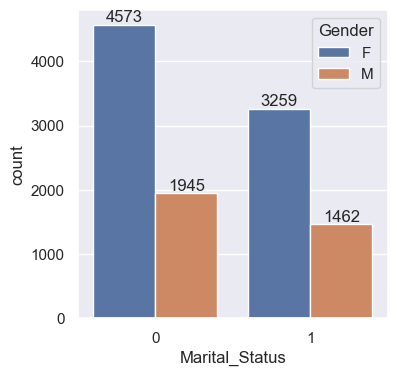

In [86]:
ax2= sns.countplot(x = 'Marital_Status', hue= "Gender", data= df)
sns.set(rc={'figure.figsize': (4,4)})
for bars in ax2.containers:
    ax2.bar_label(bars)

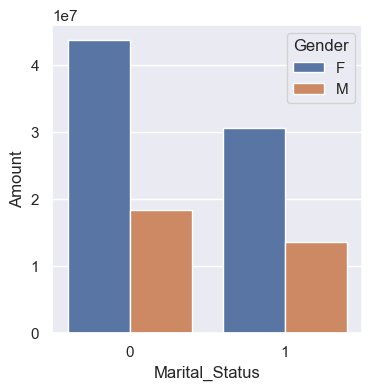

In [107]:
#Total amount Vs Marital Status
sales_marital=df.groupby(['Marital_Status', 'Gender'], as_index= False)["Amount"].sum().sort_values(by="Amount", ascending= False)
sns.set(rc={'figure.figsize': (4,4)})
ax=sns.barplot(x= 'Marital_Status' , y="Amount", hue="Gender", data= sales_marital)


In [69]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## By State ##

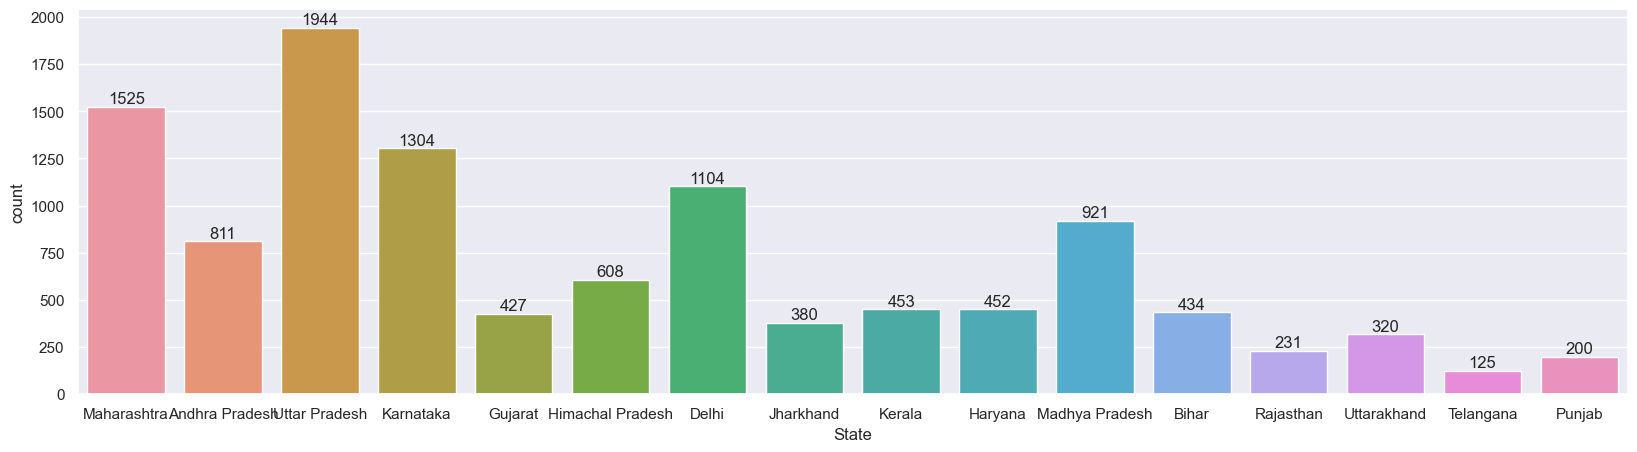

In [109]:
#Count of State
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data= df,x= 'State')

for bars in ax.containers:
    ax.bar_label(bars)

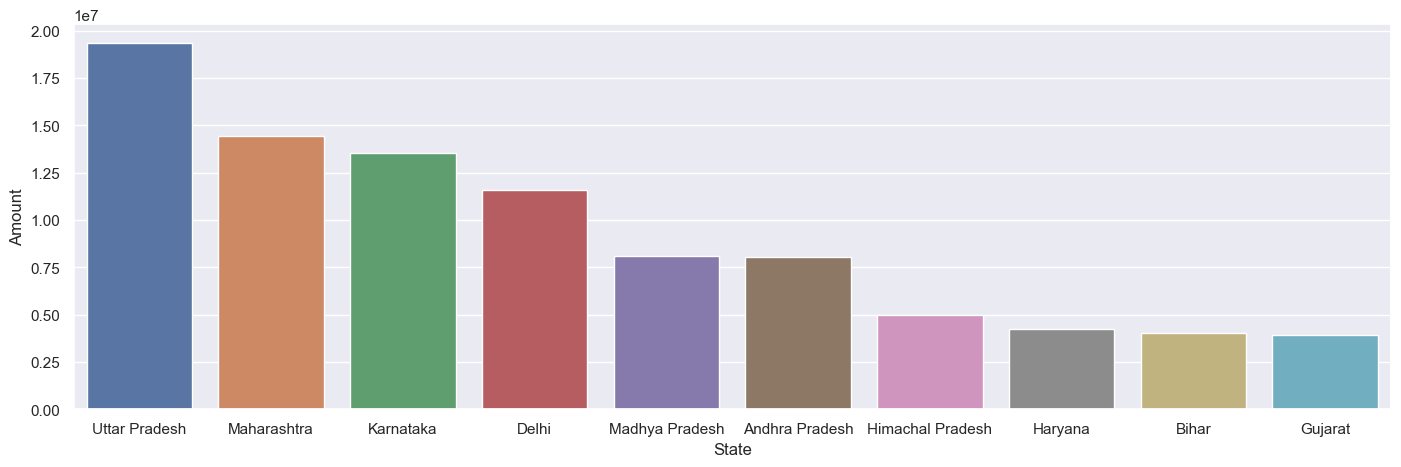

In [102]:
#states vs Amount
sales_state=df.groupby(['State'], as_index= False)["Amount"].sum().sort_values(by="Amount", ascending= False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
ax=sns.barplot(x="State", y="Amount", data= sales_state)

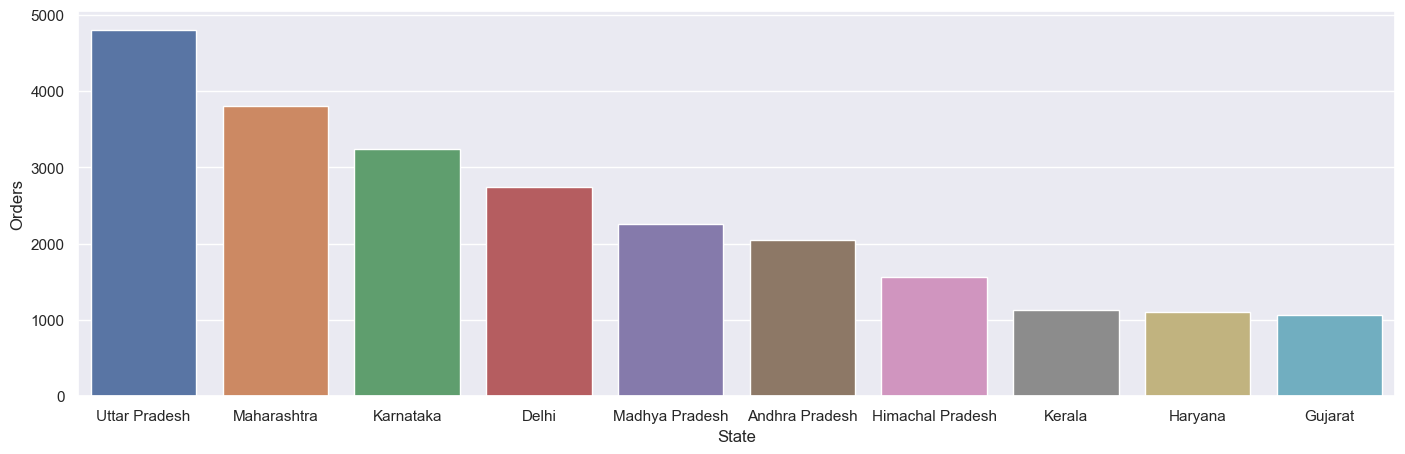

In [104]:
#states vs Order
sales_state=df.groupby(['State'], as_index= False)["Orders"].sum().sort_values(by="Orders", ascending= False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
ax=sns.barplot(x="State", y="Orders", data= sales_state)

From the above graphs, the most of order & total sales are the Uttar Pradesh, Maharashtra and karnataka

## Occupation ##

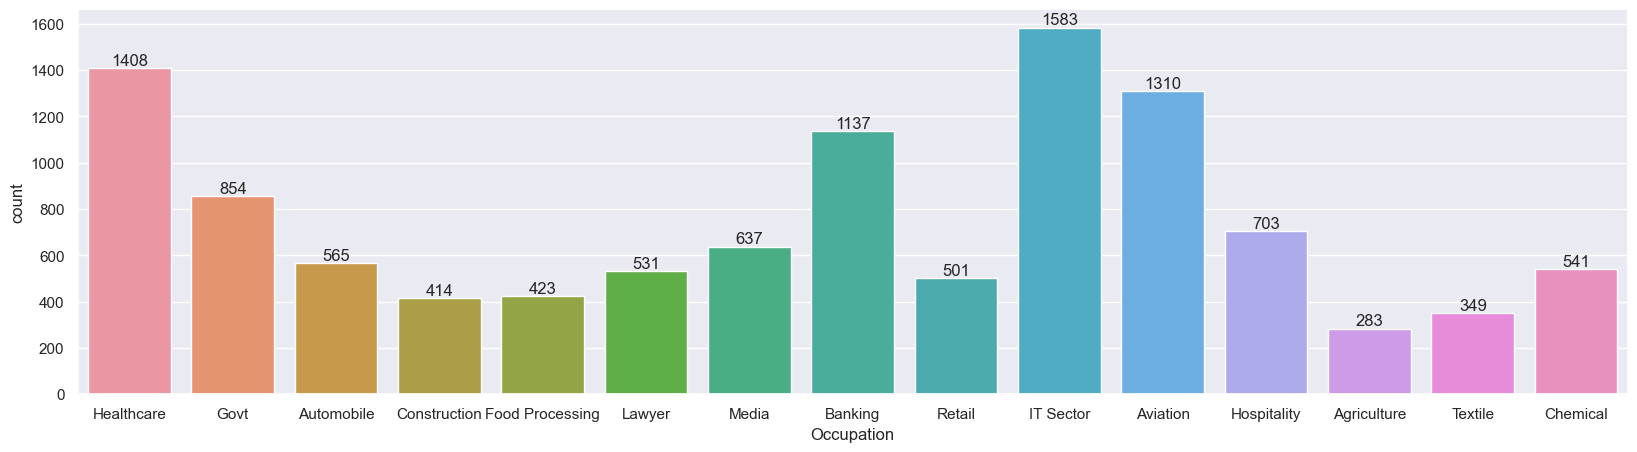

In [110]:
#Count of Occupation
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data= df,x= 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

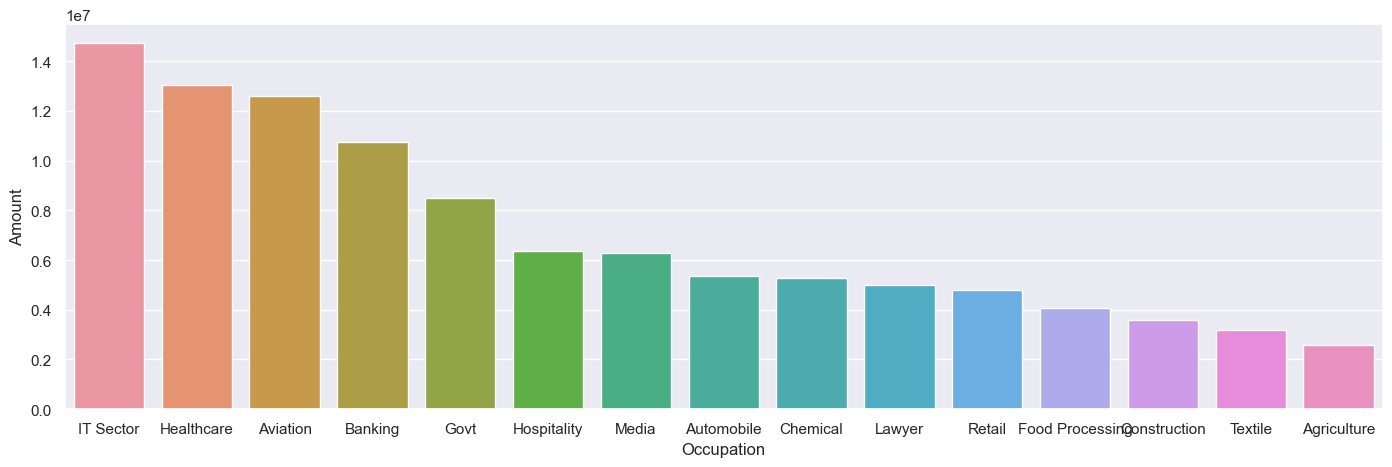

In [112]:
 #Total Amount Vs Occupation
sales_occp=df.groupby(['Occupation'], as_index= False)["Amount"].sum().sort_values(by="Amount", ascending= False)
sns.set(rc={'figure.figsize':(17,5)})
ax=sns.barplot(x="Occupation", y="Amount", data= sales_occp)

Most of the buyers are IT Sector, Healthcare and Aviation Sector from the above graph

In [116]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## By Product Category ##

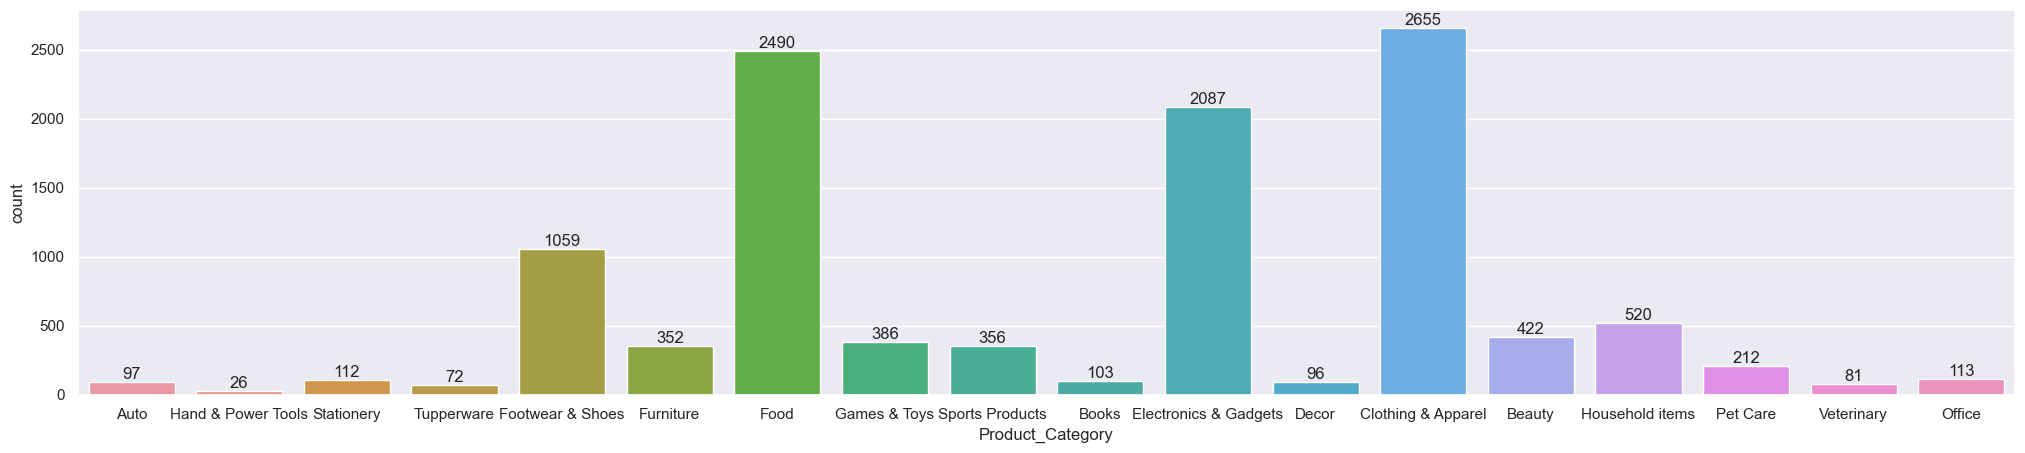

In [131]:
#Count of Product Category
sns.set(rc={'figure.figsize':(25,5)})
ax= sns.countplot(data= df,x= 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)


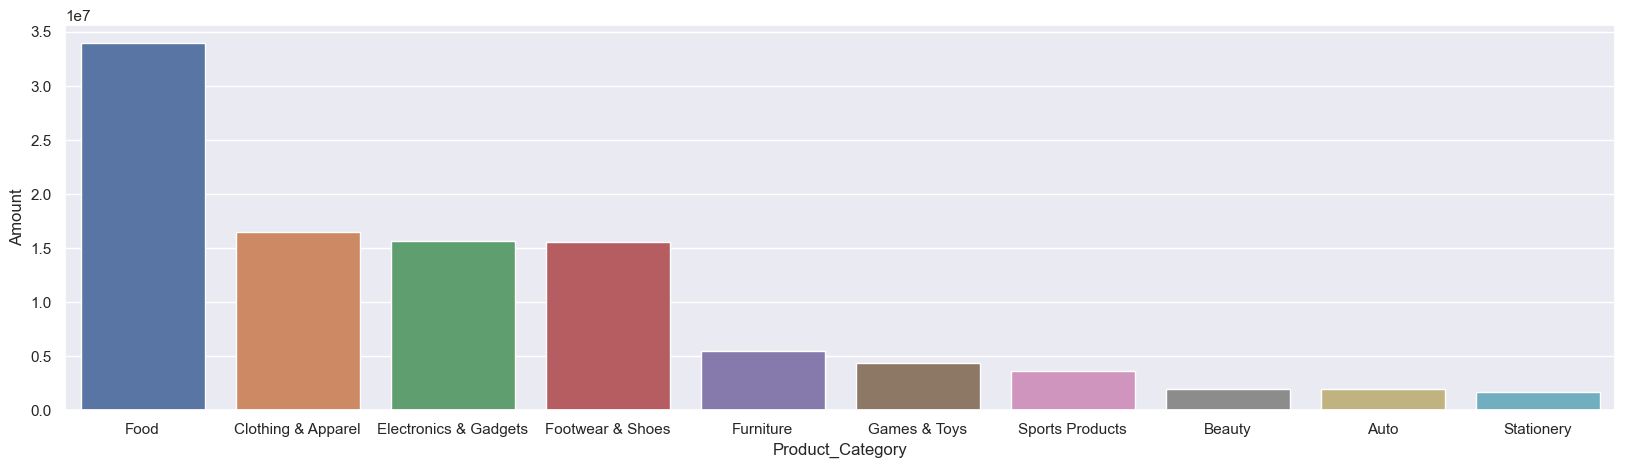

In [140]:
 #Total Amount Vs Product Category
sales_prod=df.groupby(['Product_Category'], as_index= False)["Amount"].sum().sort_values(by="Amount", ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x="Product_Category", y="Amount", data= sales_prod)

From the above observation, most of the sold products are from Food, Clothing & Apparel and electronics & Gadgets

<Axes: xlabel='Product_ID'>

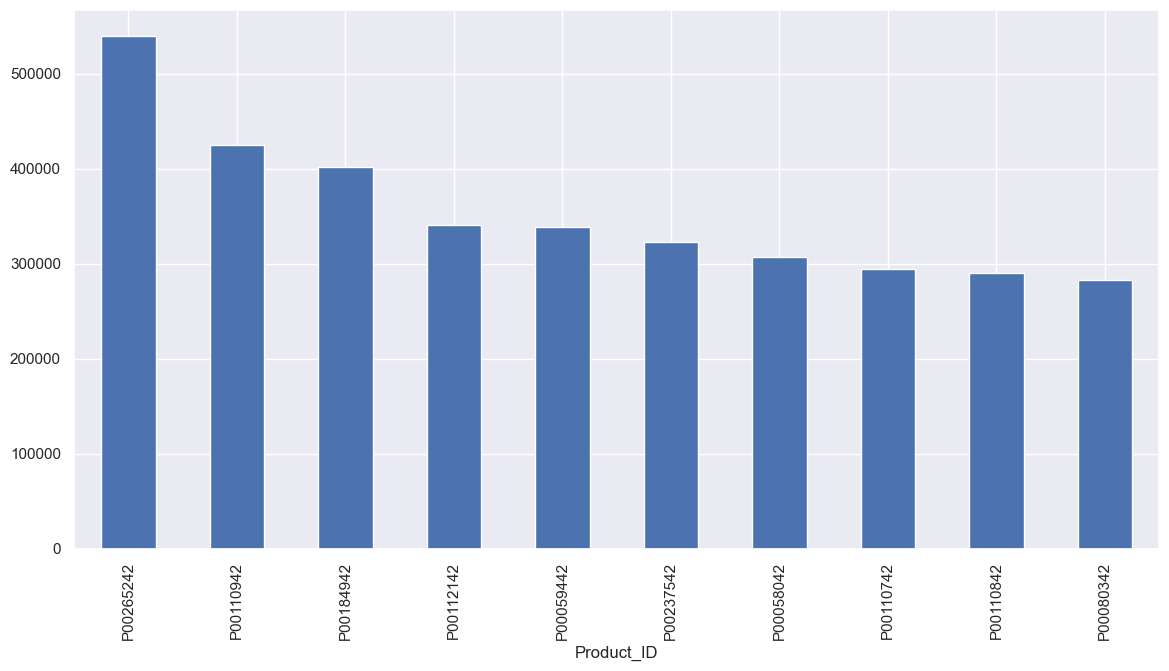

In [150]:
# top 5 sold product 
fig1, ax1=plt.subplots(figsize=(14,7))
df.groupby('Product_ID')["Amount"].sum().nlargest(10).sort_values(ascending = False).plot(kind= 'bar')

# Conclusion #

Based on my observation, married women aged 26-35 years from Uttar Pradesh, Maharashtra, and Karnataka, employed in the IT, Healthcare, and Aviation sectors, are more inclined to purchase products from the Food, Clothing & Apparel, and Electronics & Gadgets categories.